# This code is about designing a simulator to evaluate the events of birthday conflicts, assuming:

1. uniform distribution of the birthday during the year
2. realistic distribution of the birthday, taking from real statistics

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Real_Bth_Distribution import birth_cdf_inverse
from collections import defaultdict
import random

In [2]:
# function to find the conflits of birthday with uniform distribution for producing birthday for each person

def uniform_birthday():
    
    #np.random.seed(seed)
    
    # defining the paramaters
    n = 366
    list_people = np.zeros(366)
    m = 0
    flag = 1
    
    # creating m instance of uniform dist. untill a conflit appears
    while flag:

        rv_person = int(np.random.uniform(0, n))#have to use randint instead
        
        if list_people[rv_person] == 0:#it's a list of dates
            list_people[rv_person] = 1
            m += 1
        else:
            flag = 0
                        
    return m

In [3]:
# function to find the conflits of birthday with real distribution for producing birthday for each person

def real_birthday():
    
    #random.seed(seed)
    
    # defining the paramaters
    n = 365
    list_people = np.zeros(366)
    m = 0
    flag = 1
    
    # creating m instance of real dist. untill a conflit appears
    while flag:
        
        # using real distribution function instead of uniform one
        rv_person = birth_cdf_inverse(seed)
        
        if list_people[rv_person] == 0:
            list_people[rv_person] = 1
            m += 1
        else:
            flag = 0
                        
    return m

In [4]:
# defining different seeds to simulate the experiments
seeds_ave = [s for s in range(32, 201, 10)]

# Evaluating the average number of people to observe a conflict and comparing with the theoretical result

In [5]:
# one dictionary to store the average numbers for each seed
# noted that number of experiment (inctances) for each seed must be more 32 in order to meet central limit theorem

dict_seed_conflicts = {}

# simulation
for seed in seeds_ave:
    
    np.random.seed(seed)
    random.seed(seed)
    
    m_conflict_uniform = []
    m_conflict_real = []
    
    # creating instances
    for _ in range(0, 1000):
        m_conflict_uniform.append(uniform_birthday())#we append the number of collisions
        m_conflict_real.append(real_birthday())
    
    # assigning average numbers to each seed
    dict_seed_conflicts[seed] = ((sum(m_conflict_uniform)/len(m_conflict_uniform)), (sum(m_conflict_real)/len(m_conflict_real)))

In [6]:
print('In theory: for n = 365, m ≈ 22.3 and E[m] = 23.9 and the emprical E[m] for each seed are as follows: ')
dict_seed_conflicts_df = pd.DataFrame(dict_seed_conflicts, index=['uniform', 'realistic']).T
dict_seed_conflicts_df

In theory: for n = 365, m ≈ 22.3 and E[m] = 23.9 and the emprical E[m] for each seed are as follows: 


,uniform,realistic
32,23.322,23.125
42,23.247,23.749
52,23.808,23.788
62,24.435,23.195
72,23.253,23.884
82,23.398,23.636
92,23.427,23.538
102,24.804,23.656
112,23.973,23.143
122,23.227,23.349


# Evaluating the probability of birthday conflict in function of m and comparing with the theoretical result.

In [7]:
seeds_prob = [s for s in range(32, 53, 10)]

In [17]:
# list of students to put in all class 
# to evaluate in how many classes we have conflict with the same number of students >= 2 in each class
# noted that number of experiment (inctances) for each seed must be more 32 in order to meet central limit theorem
student = [i for i in range(2, 100)]
dict_prob_m_uniform = defaultdict(list)
dict_prob_m_real = defaultdict(list)
dict_seed_classes = {}

# simulation for each seed
for seed in seeds_prob:
    
    # creating instances
    for m in student:
        # create classes to put studets into
        list_class_uniform = [0] * 20
        list_class_real = [0] * 20
        
        # providing each class a constant number(m) of students and for the conflict after filling the classes
        for c in range(len(list_class_uniform)):

            birthdays_uniform = [int(np.random.uniform(0, 366)) for _ in range(0, m)]
            birthdays_real = [int(real_birthday()) for _ in range(0, m)]
            
            # checking if there is a conflict in one specific class and make it 1
            if len(birthdays_uniform) != len(set(birthdays_uniform)):
                list_class_uniform[c] = 1
                
            if len(birthdays_real) != len(set(birthdays_real)):
                list_class_real[c] = 1
        
        # computing the probability of birthday conflict in function of m
        dict_prob_m_uniform[m].append([seed, sum(list_class_uniform)/len(list_class_uniform)])
        dict_prob_m_real[m].append([seed, sum(list_class_real)/len(list_class_real)])
        
    dict_seed_classes[seed] = (dict_prob_m_uniform, dict_prob_m_real)

In [12]:
dict_prob_m_uniform[2][0]

52

In [11]:
dict_seed_classes[42]

({2: (52, 0.0),
  3: (52, 0.0),
  4: (52, 0.0),
  5: (52, 0.0),
  6: (52, 0.0),
  7: (52, 0.1),
  8: (52, 0.05),
  9: (52, 0.1),
  10: (52, 0.15),
  11: (52, 0.2),
  12: (52, 0.1),
  13: (52, 0.2),
  14: (52, 0.25),
  15: (52, 0.25),
  16: (52, 0.35),
  17: (52, 0.35),
  18: (52, 0.4),
  19: (52, 0.55),
  20: (52, 0.4),
  21: (52, 0.35),
  22: (52, 0.5),
  23: (52, 0.55),
  24: (52, 0.4),
  25: (52, 0.5),
  26: (52, 0.45),
  27: (52, 0.7),
  28: (52, 0.75),
  29: (52, 0.7),
  30: (52, 0.6),
  31: (52, 0.65),
  32: (52, 0.75),
  33: (52, 0.8),
  34: (52, 0.85),
  35: (52, 0.75),
  36: (52, 0.85),
  37: (52, 0.85),
  38: (52, 0.9),
  39: (52, 0.85),
  40: (52, 1.0),
  41: (52, 0.9),
  42: (52, 0.9),
  43: (52, 1.0),
  44: (52, 0.9),
  45: (52, 0.95),
  46: (52, 0.95),
  47: (52, 0.85),
  48: (52, 0.8),
  49: (52, 0.95),
  50: (52, 1.0),
  51: (52, 1.0),
  52: (52, 1.0),
  53: (52, 1.0),
  54: (52, 0.95),
  55: (52, 1.0),
  56: (52, 0.95),
  57: (52, 0.9),
  58: (52, 1.0),
  59: (52, 1.0)

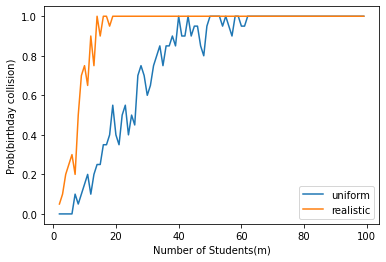

In [13]:
plt.plot(dict_prob_m_uniform.keys(), dict_prob_m_uniform.values(), label='uniform')
plt.plot(dict_prob_m_real.keys(), dict_prob_m_real.values(), label='realistic')
plt.xlabel('Number of Students(m)')
plt.ylabel('Prob(birthday collision)')
plt.legend()
plt.show()

In [4]:
tmp=[0.1,0.2,0.5,6.5]

In [5]:
min(tmp)

0.1

In [6]:
#degree of freedom 999

In [10]:
#we don't need to change the seeds, one is enough since the instances are compeletly independant from each other
# if it was a queueing shit, then we needed other seeds but it's not like that 

In [9]:
#if we want to have the confidence intervals, we have to consider it like we have ran the experience
#15000 times and it's like those outputs we have in the table are like a new distro and we have to 
#compute the confidence interval based on them, like we have to get the mean of these numbers,std of these numbers and etc.

In [11]:
#the cdf code is based on slides, emperical shit 

In [ ]:
#have to check the cdf as well,
#hvae to plot the probs and stuff 

In [2]:
#we only need one seed to deal with the stuff and we give it to our simulation in the beggining of the code 